In [28]:
import pandas as pd
players_data = pd.read_csv('datasets_1358_30676_Players.csv')
players_data.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


## Определить динамику среднего роста игроков по годам

In [34]:
players_data_year = players_data.filter(items = ['born','height']).groupby('born').agg(['mean'])
players_data_year.head()

,height
,mean
born,
1913.0,185.000000
1914.0,180.000000
1915.0,198.000000
1917.0,189.333333
1918.0,186.200000


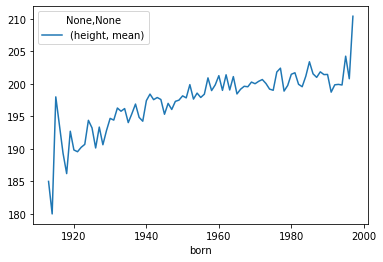

In [32]:
players_data_year.plot()

Динамика среднего роста по годам рождения показывает что с 1920 по 1970 наблюдался стабильный тренд на его увеличение со средних 190 до 200 см. Начиная 1970 этот показатель стабилизировался и только в 1997 наблюдается резкий скачек. Явбялется ли он выбросом или эе это новая ступень - могут показать только данные последующих лет.

## Определить топ городов рождения игроков

In [33]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
players_data_birth_city = players_data.filter(items = ['birth_city', 'born']).groupby('birth_city').agg(['count']).reset_index()
players_data_birth_city.columns = ['city','count']
players_data_birth_city = players_data_birth_city.sort_values('count', ascending=False).head(10)
players_data_birth_city

,city,count
193,Chicago,114
641,Los Angeles,88
869,Philadelphia,83
128,Brooklyn,76
784,New York,71
1189,Washington,62
280,Detroit,58
39,Atlanta,37
49,Baltimore,37
258,Dallas,33


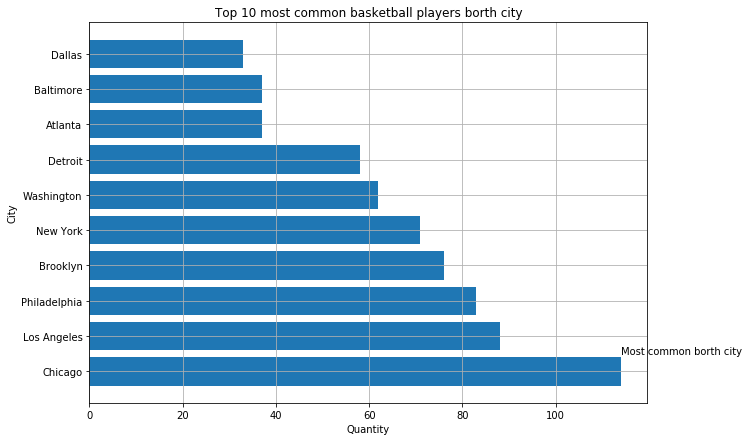

In [73]:
plt.barh(players_data_birth_city['city'], players_data_birth_city['count'])
plt.xlabel('Quantity')
plt.ylabel('City')
plt.title('Top 10 most common basketball players borth city')
plt.text(114, 0.5,'Most common borth city')
plt.grid()

Город, где родилось наибольшее количество игроков NBA является Чикаго

## Определить различие статистических метрик индекса масса/рост до 1960 и после

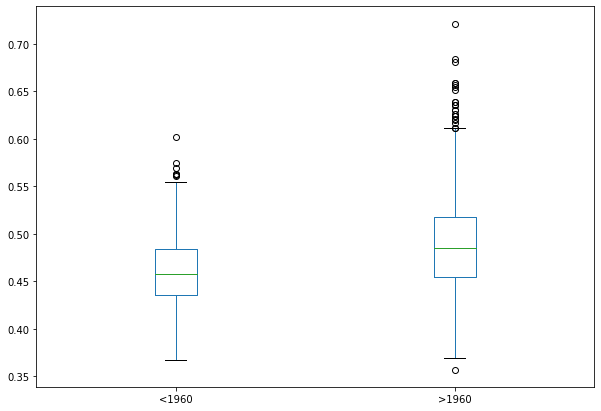

In [106]:
players_data_index = players_data.filter(items = ['height', 'weight', 'born'])
players_data_index['index'] = players_data_index['weight']/players_data_index['height']
players_data_index.loc[(players_data_index['born'] > 1960), 'year'] = '>1960'
players_data_index.loc[(players_data_index['born'] <= 1960), 'year'] = '<1960'
players_data_index = players_data_index.filter(items = ['index','year'])
players_data_index.pivot(columns='year', values='index').filter(items = ['<1960','>1960']).plot(kind = 'box')


Из представленных статистик индекса видно, что после 1960 индекс стал выше, что в совакупности со знанием о том, что спортсмены стали выше, говорит что при это они стали обладать еще большей массой удельно на рост, 
после 1960 болше выбросных значечений в верхней части и почти одинаковы минимумы

## Построить зависимость веса от роста 

In [107]:
import seaborn as sns


In [111]:
players_data_height_weight = players_data[['height','weight']]
players_data_height_weight.head()

,height,weight
0,180.0,77.0
1,188.0,83.0
2,193.0,86.0
3,196.0,88.0
4,178.0,79.0


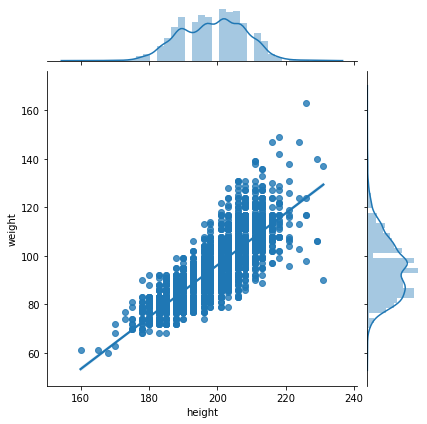

In [112]:
sns.jointplot(x='height', y='weight', 
              data=players_data_height_weight, kind='reg')

Зависимость практически линейная с чем больше рост тем большим разбросом. Распределение величин веса и роста практически нормальные